# Compressed sensing with images, example

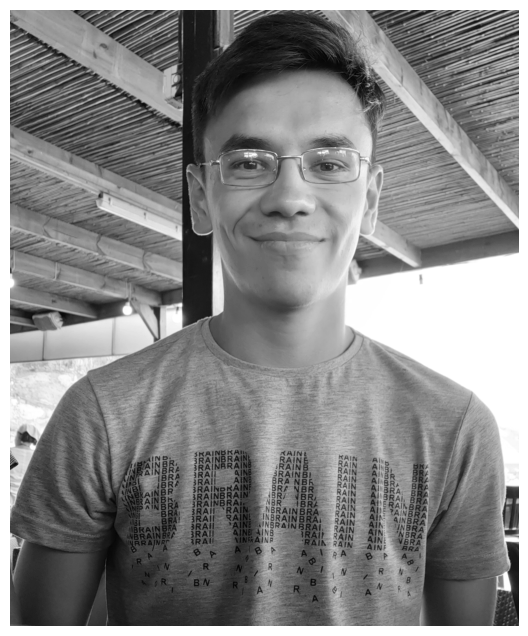

In [1]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

# A = imread(os.path.join('..','DATA','jelly.jpg'))
A = imread('Mekan_Hojayev.jpg')
Abw = np.mean(A, -1); # Convert RGB to grayscale

plt.imshow(Abw,cmap='gray')
plt.axis('off')
plt.show()

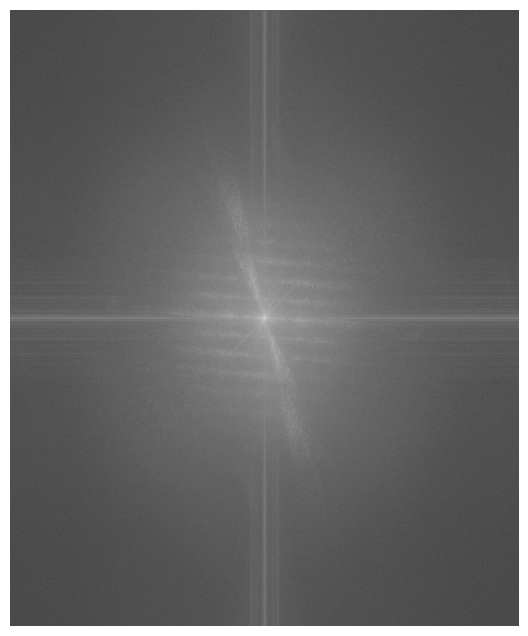

In [2]:
## Compute FFT of image using fft2
At = np.fft.fft2(Abw)
F = np.log(np.abs(np.fft.fftshift(At))+1) # Put FFT on log scale
plt.imshow(F,cmap='gray')
plt.axis('off')
plt.show()

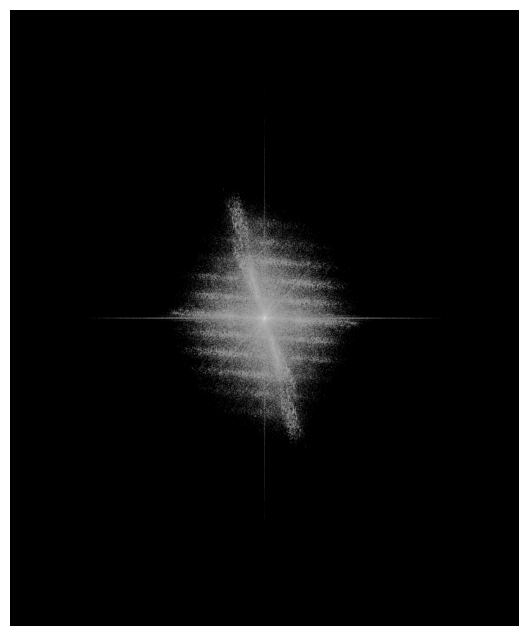

In [3]:
## Zero out all small coefficients and inverse transform
Bt = np.sort(np.abs(np.reshape(At,-1)))
keep = 0.05
thresh = Bt[int(np.floor((1-keep)*len(Bt)))]
ind = np.abs(At) > thresh
Atlow = At * ind
Flow = np.log(np.abs(np.fft.fftshift(Atlow))+1) # Put FFT on log scale

plt.imshow(Flow,cmap='gray')
plt.axis('off')
plt.show()

C:\Users\Mekan\AppData\Local\Temp\ipykernel_13372\648093332.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  Alow = np.fft.ifft2(Atlow).astype('uint8')


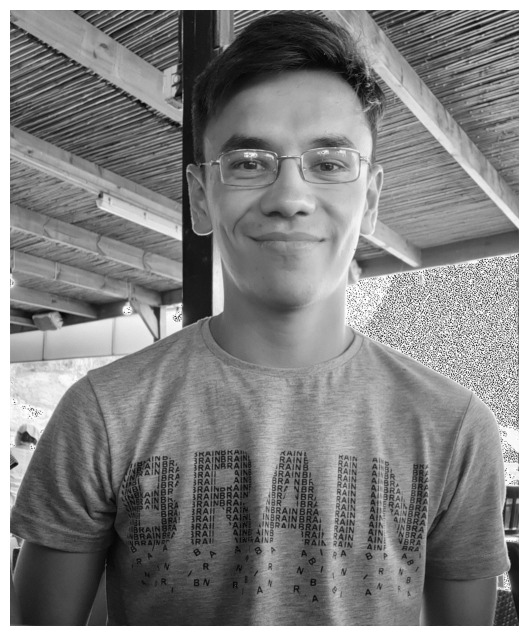

In [4]:
## Plot Reconstruction
Alow = np.fft.ifft2(Atlow).astype('uint8')

plt.imshow(Alow,cmap='gray')
plt.axis('off')
plt.show()

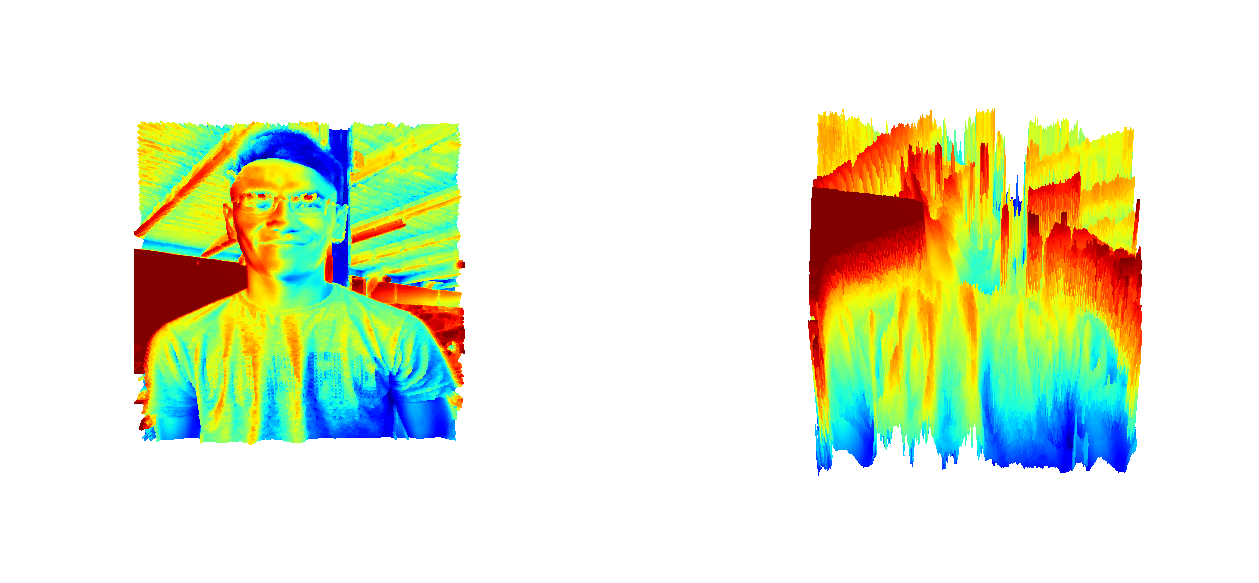

In [5]:
plt.rcParams['figure.figsize'] = [16, 8]

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

Anew = Abw[::5,::5]

y = np.arange(Anew.shape[0])
x = np.arange(Anew.shape[1])

X,Y = np.meshgrid(x,y)

surf1 = ax1.plot_surface(X,Y,Anew, rstride=1, cstride=1,cmap='jet',
                       linewidth=1, antialiased=False)
surf2 = ax2.plot_surface(X,Y,Anew, rstride=1, cstride=1,cmap='jet',
                       linewidth=1, antialiased=False)

ax1.view_init(90, 90) 
ax1.axis('off')

ax2.view_init(60, 90) 
ax2.axis('off')

plt.show()

# underdetermined system

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize
plt.rcParams['figure.figsize'] = [12, 18]
plt.rcParams.update({'font.size': 18})

# Solve y = Theta * s for "s"
n = 1000 # dimension of s
p = 200  # number of measurements, dim(y)
Theta = np.random.randn(p,n)
y = np.random.randn(p)

# L1 Minimum norm solution s_L1
def L1_norm(x):
    return np.linalg.norm(x,ord=1)

constr = ({'type': 'eq', 'fun': lambda x:  Theta @ x - y})
x0 = np.linalg.pinv(Theta) @ y # initialize with L2 solution
res = minimize(L1_norm, x0, method='SLSQP',constraints=constr)
s_L1 = res.x

In [7]:
# L2 Minimum norm solution s_L2
s_L2 = np.linalg.pinv(Theta) @ y 

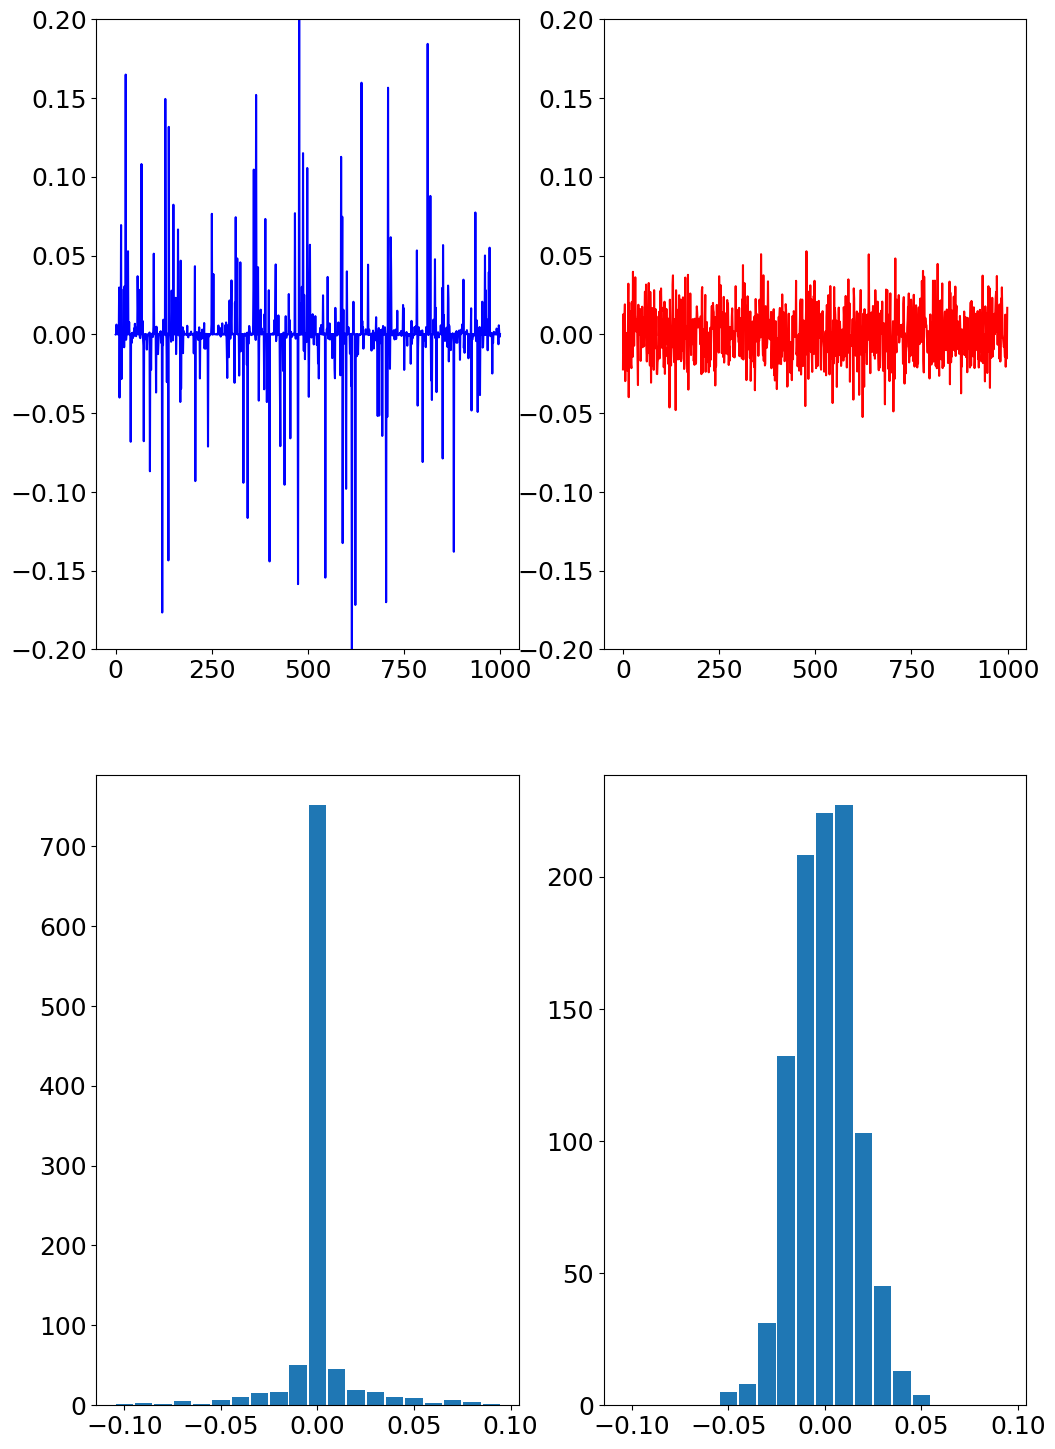

In [8]:
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
axs[0].plot(s_L1,color='b',linewidth=1.5)
axs[0].set_ylim(-0.2,0.2)
axs[1].plot(s_L2,color='r',linewidth=1.5)
axs[1].set_ylim(-0.2,0.2)
axs[2].hist(s_L1,bins=np.arange(-0.105,0.105,0.01),rwidth=0.9)
axs[3].hist(s_L2,bins=np.arange(-0.105,0.105,0.01),rwidth=0.9)

plt.show()

# The geometry of compression

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import os
import scipy.io
from scipy.fftpack import dct, idct
from scipy.optimize import minimize


plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})

mat = scipy.io.loadmat('CC2.mat')
CC = mat['CC']
CC_map = ListedColormap(CC)

p = 14
n = 32

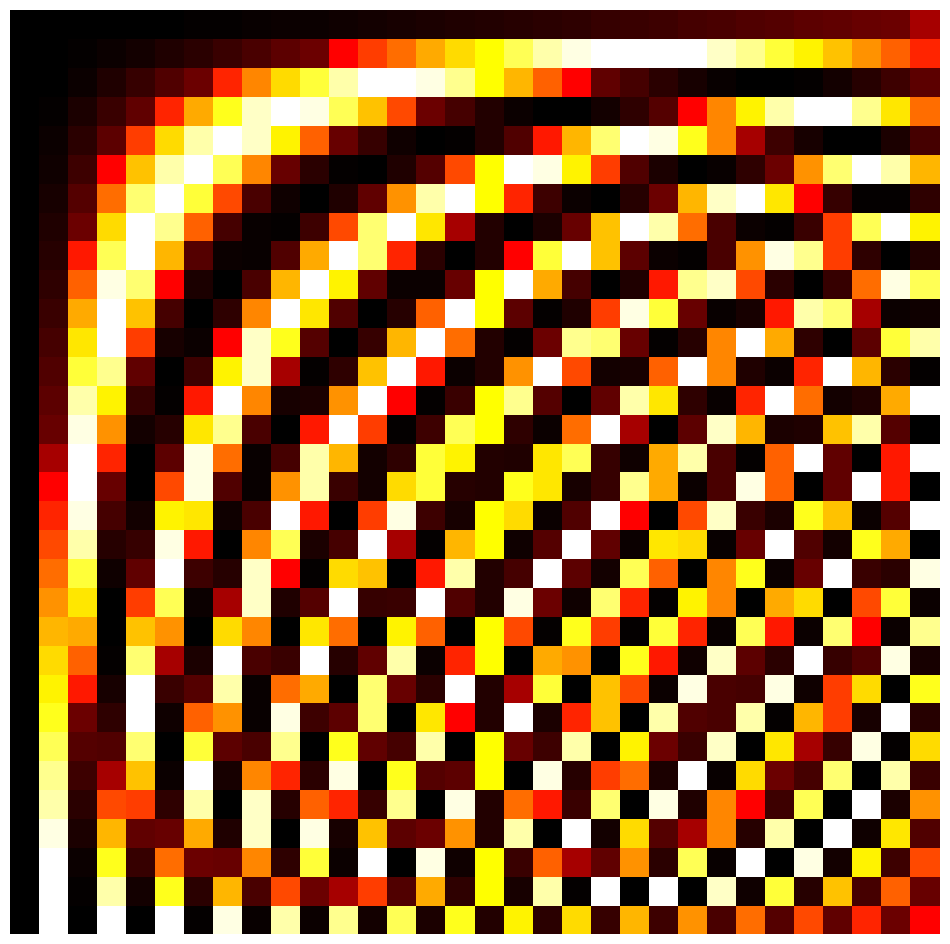

In [10]:
Psi = dct(np.identity(n))
plt.pcolor(np.flipud(Psi),cmap=CC_map)
plt.axis('off')
plt.show()

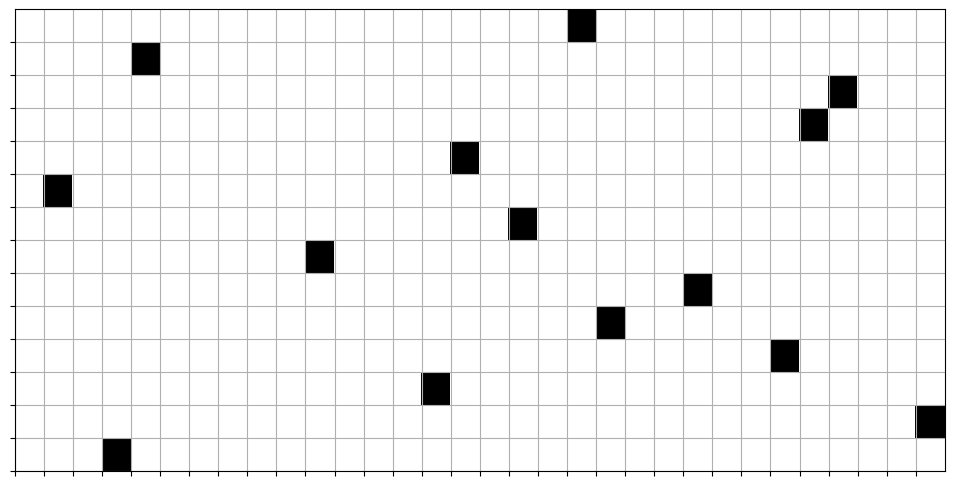

In [11]:
## Plot C
plt.rcParams['figure.figsize'] = [12, 6]
fig,ax = plt.subplots(1,1)
C = np.identity(n)
perm = np.random.permutation(n)[:p]
C = C[perm,:] # compressed measurement
plt.pcolor(np.flipud(C),cmap=CC_map)
plt.grid(True)
plt.xticks(np.arange(n))
plt.yticks(np.arange(len(perm)))
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

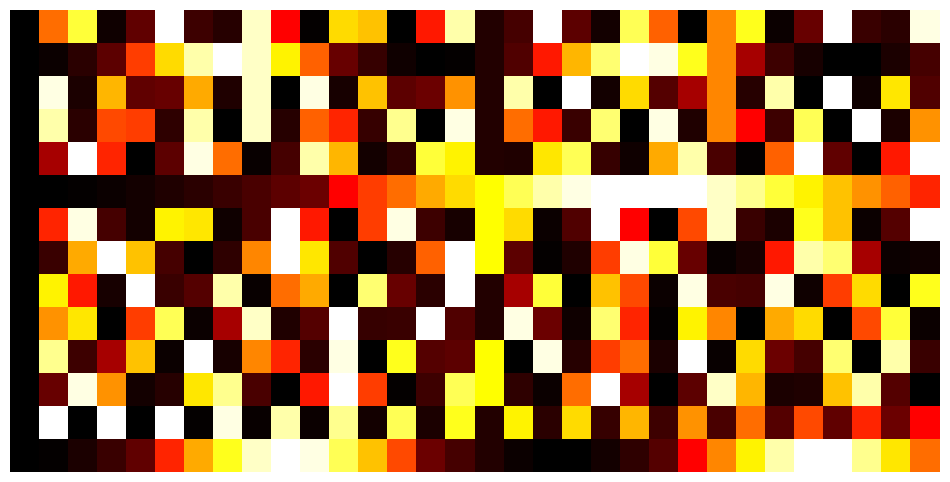

In [12]:
## Plot Theta

Theta = C @ Psi
plt.pcolor(np.flipud(Theta),cmap=CC_map)
plt.axis('off')
plt.show()

C:\Users\Mekan\AppData\Local\Temp\ipykernel_13372\767041982.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sbackslash = np.linalg.lstsq(Theta,y)[0]


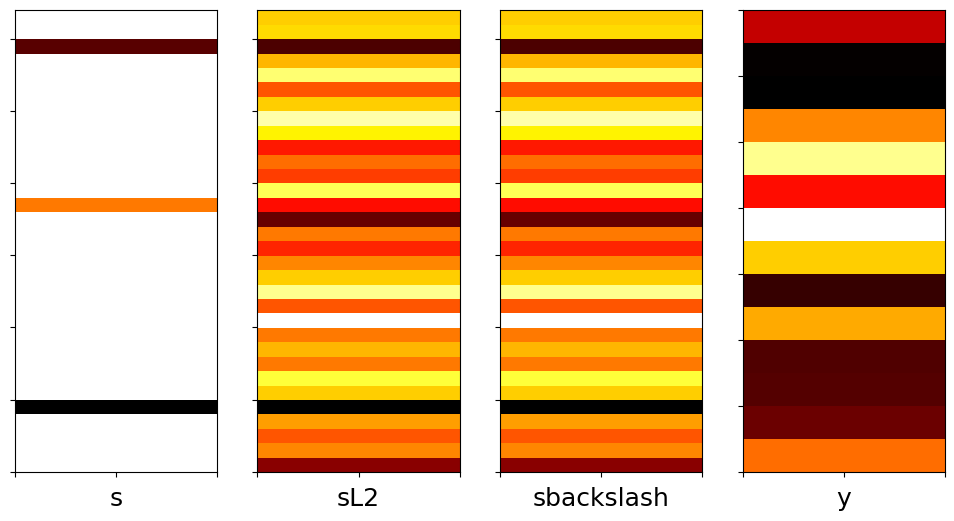

In [13]:
## Plot s, y
s = np.zeros((n,1))
s[2] = 1.4
s[13] = 0.7
s[27] = 2.2
y = C @ Psi @ s

fig,axs = plt.subplots(1,4)
axs[0].pcolor(np.flipud(s),cmap=CC_map)
axs[0].set_xlabel('s')

sL2 = np.linalg.pinv(Theta) @ y
axs[1].pcolor(np.flipud(sL2),cmap=CC_map)
axs[1].set_xlabel('sL2')

sbackslash = np.linalg.lstsq(Theta,y)[0]
axs[2].pcolor(np.flipud(sbackslash),cmap=CC_map)
axs[2].set_xlabel('sbackslash')

axs[3].pcolor(np.flipud(y),cmap=CC_map)
axs[3].set_xlabel('y')

for ax in axs:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

plt.show()

In [14]:
## L1-Minimization using SciPy
def L1_norm(x):
    return np.linalg.norm(x,ord=1)

y = y.reshape(-1)
constr = ({'type': 'eq', 'fun': lambda x:  Theta @ x - y})
x0 = np.linalg.pinv(Theta) @ y
res = minimize(L1_norm, x0, method='SLSQP',constraints=constr)
s2 = res.x

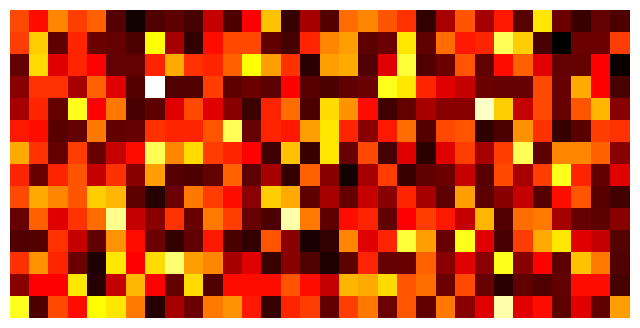

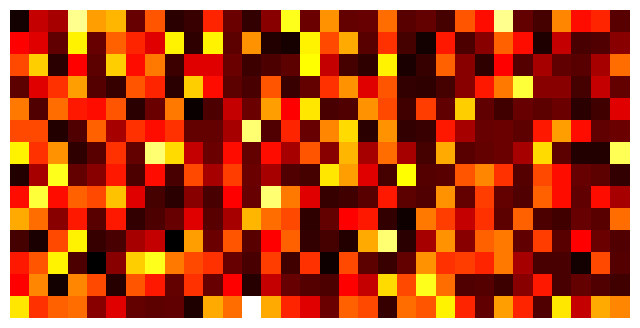

In [15]:
## Plot C and Theta (2) - Gaussian Random
plt.rcParams['figure.figsize'] = [8, 4]

C = np.random.randn(p,n)

plt.figure()
plt.pcolor(np.flipud(C),cmap=CC_map)
plt.axis('off')
plt.show()

Theta = C @ Psi
plt.figure()
plt.pcolor(np.flipud(Theta),cmap=CC_map)
plt.axis('off')
plt.show()

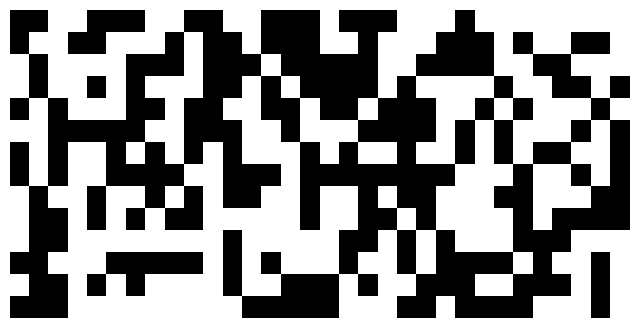

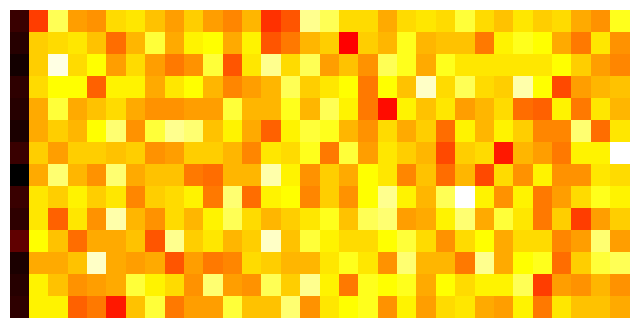

In [16]:
# Plot C and Theta (3) - Bernoulli Random
C = np.random.randn(p,n)
C = C > 0

plt.figure()
plt.pcolor(np.flipud(C),cmap=CC_map)
plt.axis('off')
plt.show()

plt.figure()
Theta = C @ Psi
plt.pcolor(np.flipud(Theta),cmap=CC_map)
plt.axis('off')
plt.show()

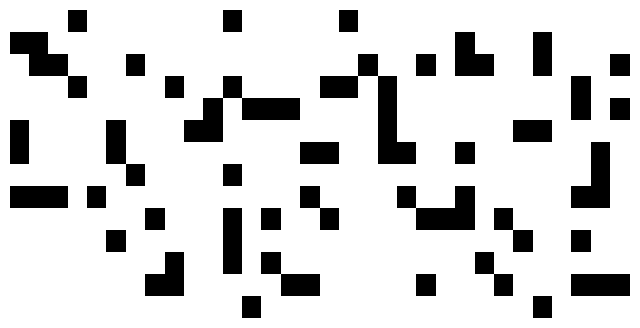

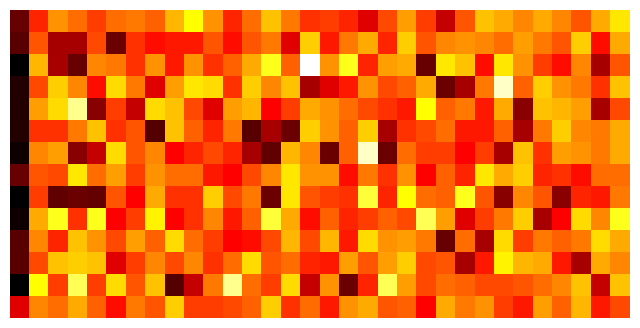

In [17]:
# Plot C and Theta (4) - Sparse Bernoulli
C = np.random.randn(p,n)
C = C > 1

plt.figure()
plt.pcolor(np.flipud(C),cmap=CC_map)
plt.axis('off')
plt.show()

plt.figure()
Theta = C @ Psi
plt.pcolor(np.flipud(Theta),cmap=CC_map)
plt.axis('off')
plt.show()

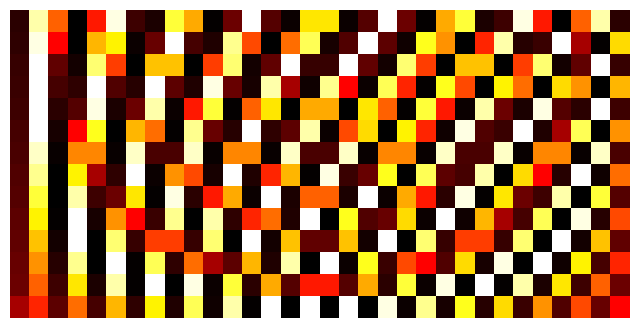

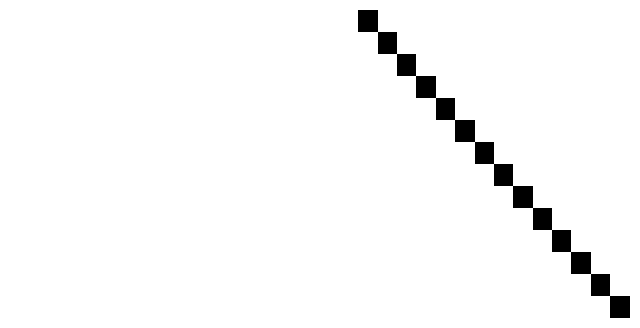

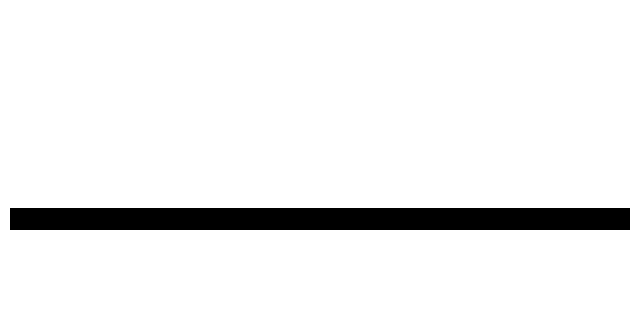

In [18]:
# Bad C and Theta (5) - DCT Meas
C = idct(np.identity(n))
perm = np.arange(n-p,n)
C = C[perm,:] # compressed measurement

plt.figure()
plt.pcolor(np.flipud(C),cmap=CC_map)
plt.axis('off')
plt.show()

plt.figure()
Theta = C @ Psi
plt.pcolor(np.flipud(Theta),cmap=CC_map)
plt.axis('off')
plt.show()

plt.figure()
y = Theta @ s
plt.pcolor(np.flipud(y),cmap=CC_map)
plt.axis('off')
plt.show()

# LASSO regression

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io
from sklearn import linear_model
from sklearn import model_selection

plt.rcParams['figure.figsize'] = [7, 7]
plt.rcParams.update({'font.size': 18})

In [20]:
A = np.random.randn(100,10) # Matrix of possible predictors
x = np.array([0, 0, 1, 0, 0, 0, -1, 0, 0, 0]) #Two nonzero predictors
b = A @ x + 2*np.random.randn(100)

xL2 = np.linalg.pinv(A) @ b

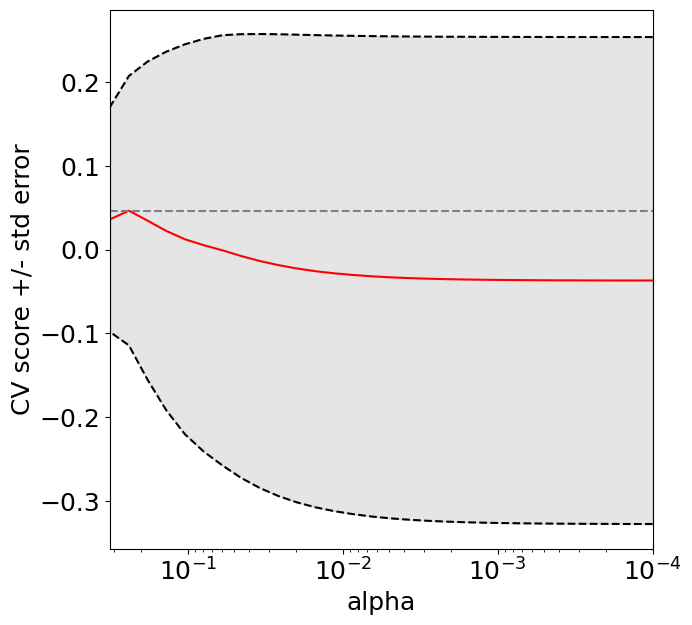

In [21]:
reg = linear_model.LassoCV(cv=10).fit(A, b)

lasso = linear_model.Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]

clf = model_selection.GridSearchCV(lasso, tuned_parameters, cv=10, refit=False)
clf.fit(A, b)

scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.semilogx(alphas, scores,'r-')

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(10)

plt.semilogx(alphas, scores + std_error, 'k--')
plt.semilogx(alphas, scores - std_error, 'k--')
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.1,color='k')

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[-1], alphas[0]])

plt.show()

In [22]:
XL1 = linear_model.Lasso(alpha=clf.best_params_['alpha'])
XL1.fit(A,b)
xL1 = XL1.coef_
xL1DeBiased = np.linalg.pinv(A[:,np.abs(xL1)>0]) @ b